In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/weather.csv')

**Preprocessing**

In [6]:
df.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [7]:
df.tail(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No
365,12.3,30.2,0.0,6.0,12.6,NW,78.0,NW,WNW,31.0,...,13,1009.6,1009.2,1,1,23.8,28.6,No,0.0,No


In [8]:
df.shape

(366, 22)

In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [11]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [12]:
df.isnull().sum()


,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31
WindDir3pm,1
WindSpeed9am,7


In [13]:
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

In [14]:
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].replace({'Yes': 1, 'No': 0})


<ipython-input-14-3247dccc88e8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})
<ipython-input-14-3247dccc88e8>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'Yes': 1, 'No': 0})


<Axes: >

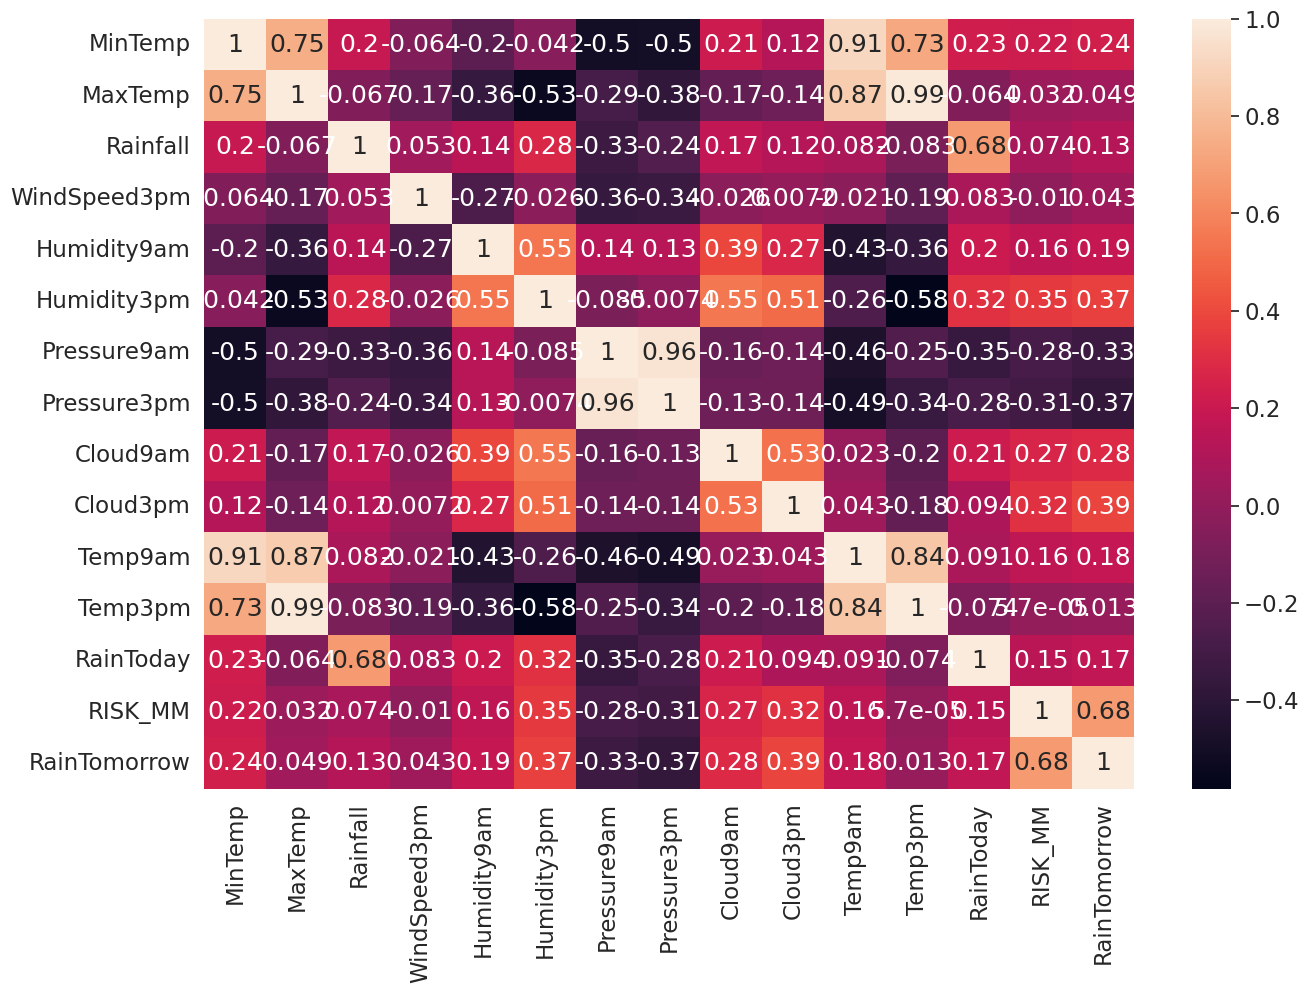

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [21]:
df.drop(['WindGustDir','WindDir9am','WindDir3pm','Sunshine','Evaporation','WindGustSpeed','WindSpeed9am'], axis = 1,inplace=True)


In [22]:
df["MinTemp"] =df['MinTemp'].astype('int')
df["MaxTemp"] =df['MaxTemp'].astype('int')
df["Rainfall"] =df['Rainfall'].astype('int')
df["Pressure9am"] =df['Pressure9am'].astype('int')
df["Pressure3pm"] =df['Pressure3pm'].astype('int')
df["Temp9am"] =df['Temp9am'].astype('int')
df["Temp3pm"] =df['Temp3pm'].astype('int')
df["RISK_MM"] =df['RISK_MM'].astype('int')
df.head(5)

,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8,24,0,20,68,29,1019,1015,7,7,14,23,0,3,1
1,14,26,3,17,80,36,1012,1008,5,3,17,25,1,3,1
2,13,23,3,6,82,69,1009,1007,8,7,15,20,1,39,1
3,13,15,39,24,62,56,1005,1007,2,7,13,14,1,2,1
4,7,16,2,28,68,49,1018,1018,7,7,11,15,1,0,0


In [23]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MinTemp       366 non-null    int64
 1   MaxTemp       366 non-null    int64
 2   Rainfall      366 non-null    int64
 3   WindSpeed3pm  366 non-null    int64
 4   Humidity9am   366 non-null    int64
 5   Humidity3pm   366 non-null    int64
 6   Pressure9am   366 non-null    int64
 7   Pressure3pm   366 non-null    int64
 8   Cloud9am      366 non-null    int64
 9   Cloud3pm      366 non-null    int64
 10  Temp9am       366 non-null    int64
 11  Temp3pm       366 non-null    int64
 12  RainToday     366 non-null    int64
 13  RISK_MM       366 non-null    int64
 14  RainTomorrow  366 non-null    int64
dtypes: int64(15)
memory usage: 43.0 KB


In [24]:

print(df.corr())

               MinTemp   MaxTemp  Rainfall  WindSpeed3pm  Humidity9am  \
MinTemp       1.000000  0.752363  0.195957     -0.064376    -0.202972   
MaxTemp       0.752363  1.000000 -0.067004     -0.167210    -0.358741   
Rainfall      0.195957 -0.067004  1.000000      0.053079     0.141696   
WindSpeed3pm -0.064376 -0.167210  0.053079      1.000000    -0.266092   
Humidity9am  -0.202972 -0.358741  0.141696     -0.266092     1.000000   
Humidity3pm  -0.042163 -0.533594  0.277103     -0.026368     0.546718   
Pressure9am  -0.504027 -0.290131 -0.327437     -0.358892     0.135920   
Pressure3pm  -0.498595 -0.375290 -0.244113     -0.337971     0.134628   
Cloud9am      0.213434 -0.174337  0.171247     -0.026426     0.392842   
Cloud3pm      0.120101 -0.136786  0.120228      0.007207     0.271938   
Temp9am       0.914748  0.868333  0.081699     -0.020993    -0.434033   
Temp3pm       0.725199  0.986773 -0.082947     -0.187757    -0.358317   
RainToday     0.227705 -0.064469  0.678244      0.0

In [25]:
df.isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0
Pressure9am,0
Pressure3pm,0
Cloud9am,0
Cloud3pm,0


<Axes: xlabel='RainTomorrow', ylabel='count'>

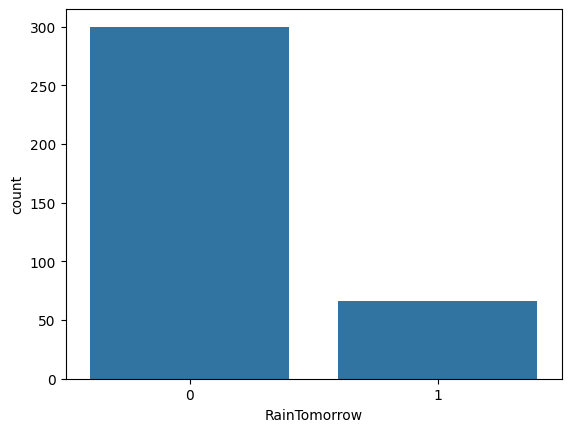

In [26]:
sns.countplot(x='RainTomorrow',data=df)

<Axes: xlabel='RainToday', ylabel='count'>

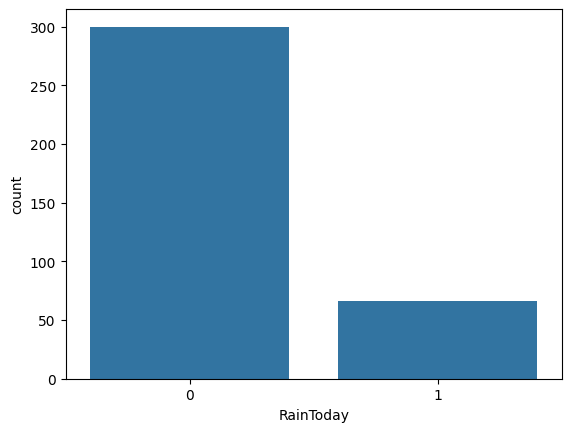

In [27]:
sns.countplot(x='RainToday',data=df)


<ipython-input-28-ab24e75ed37c>:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(data=df, x="MaxTemp", y="RainToday",errwidth=0)


<Axes: xlabel='MaxTemp', ylabel='RainToday'>

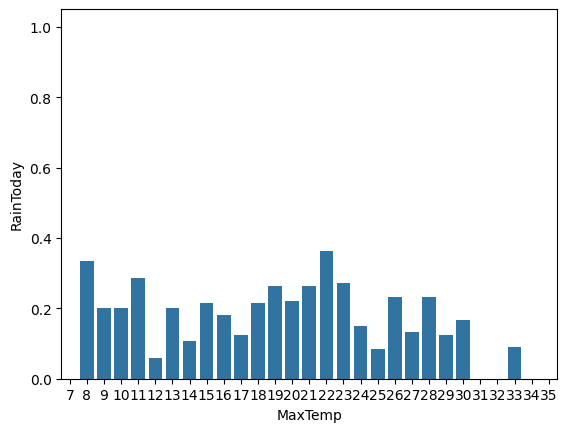

In [28]:
sns.barplot(data=df, x="MaxTemp", y="RainToday",errwidth=0)

<ipython-input-29-f86aa9384024>:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(data=df, x="MinTemp", y="RainToday",errwidth=0)


<Axes: xlabel='MinTemp', ylabel='RainToday'>

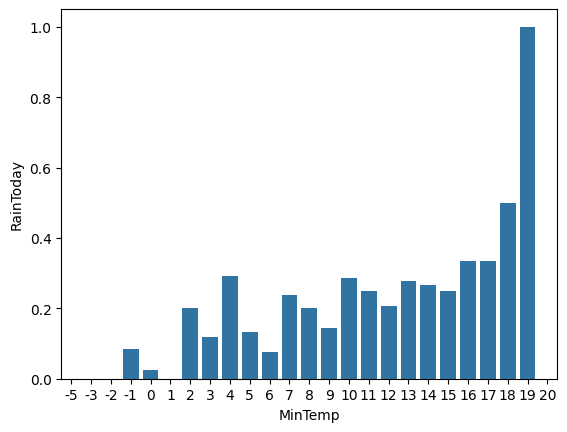

In [29]:
sns.barplot(data=df, x="MinTemp", y="RainToday",errwidth=0)


<ipython-input-30-4e018f4be600>:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(data=df, x="MaxTemp", y="RainTomorrow",errwidth= 0)


<Axes: xlabel='MaxTemp', ylabel='RainTomorrow'>

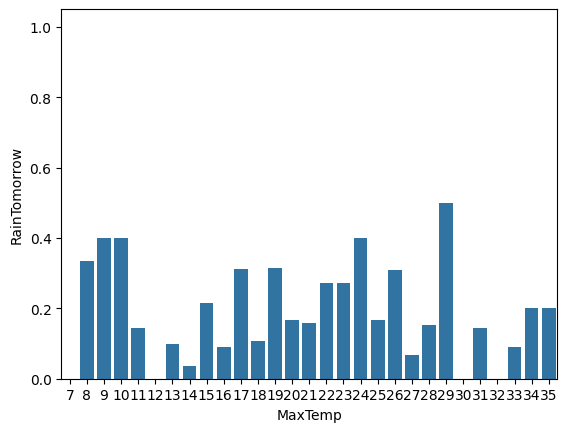

In [30]:
sns.barplot(data=df, x="MaxTemp", y="RainTomorrow",errwidth= 0)

<ipython-input-31-ad2d12ef41fc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MaxTemp'])


<Axes: xlabel='MaxTemp', ylabel='Density'>

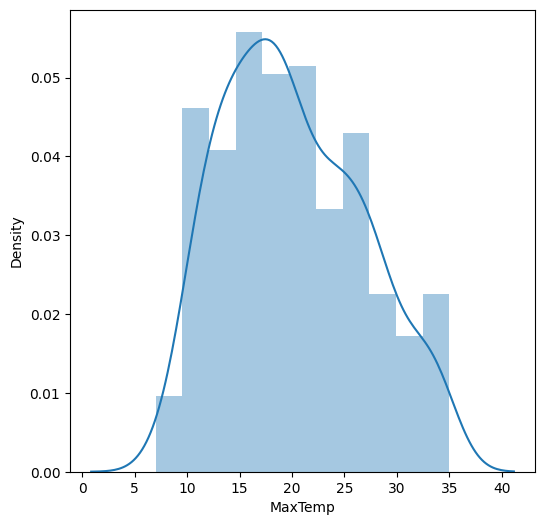

In [31]:
plt.figure(figsize=(6,6))
sns.distplot(df['MaxTemp'])

<ipython-input-32-35e63781295b>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(data =df, x="MinTemp",y="RainTomorrow",errwidth=0)


<Axes: xlabel='MinTemp', ylabel='RainTomorrow'>

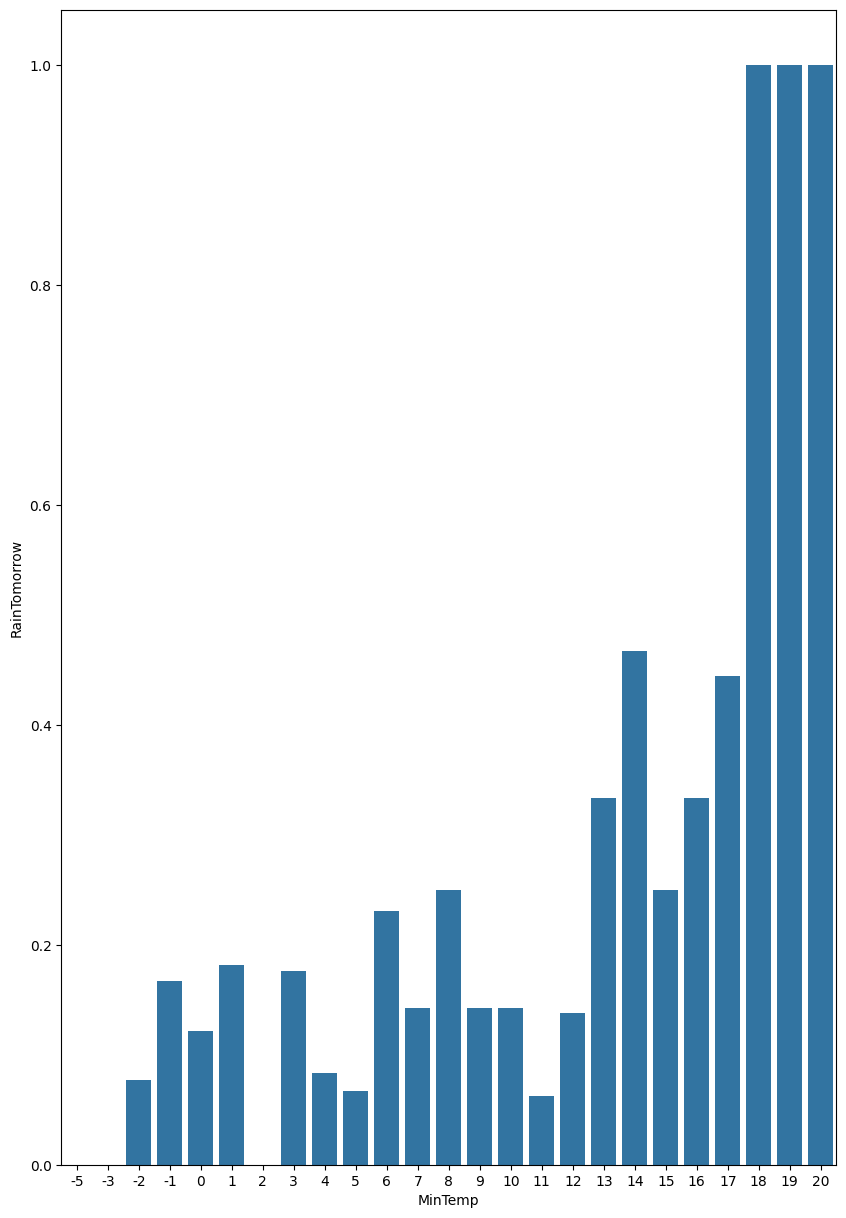

In [32]:

plt.figure(figsize=(10,15))
sns.barplot(data =df, x="MinTemp",y="RainTomorrow",errwidth=0)

<Axes: >

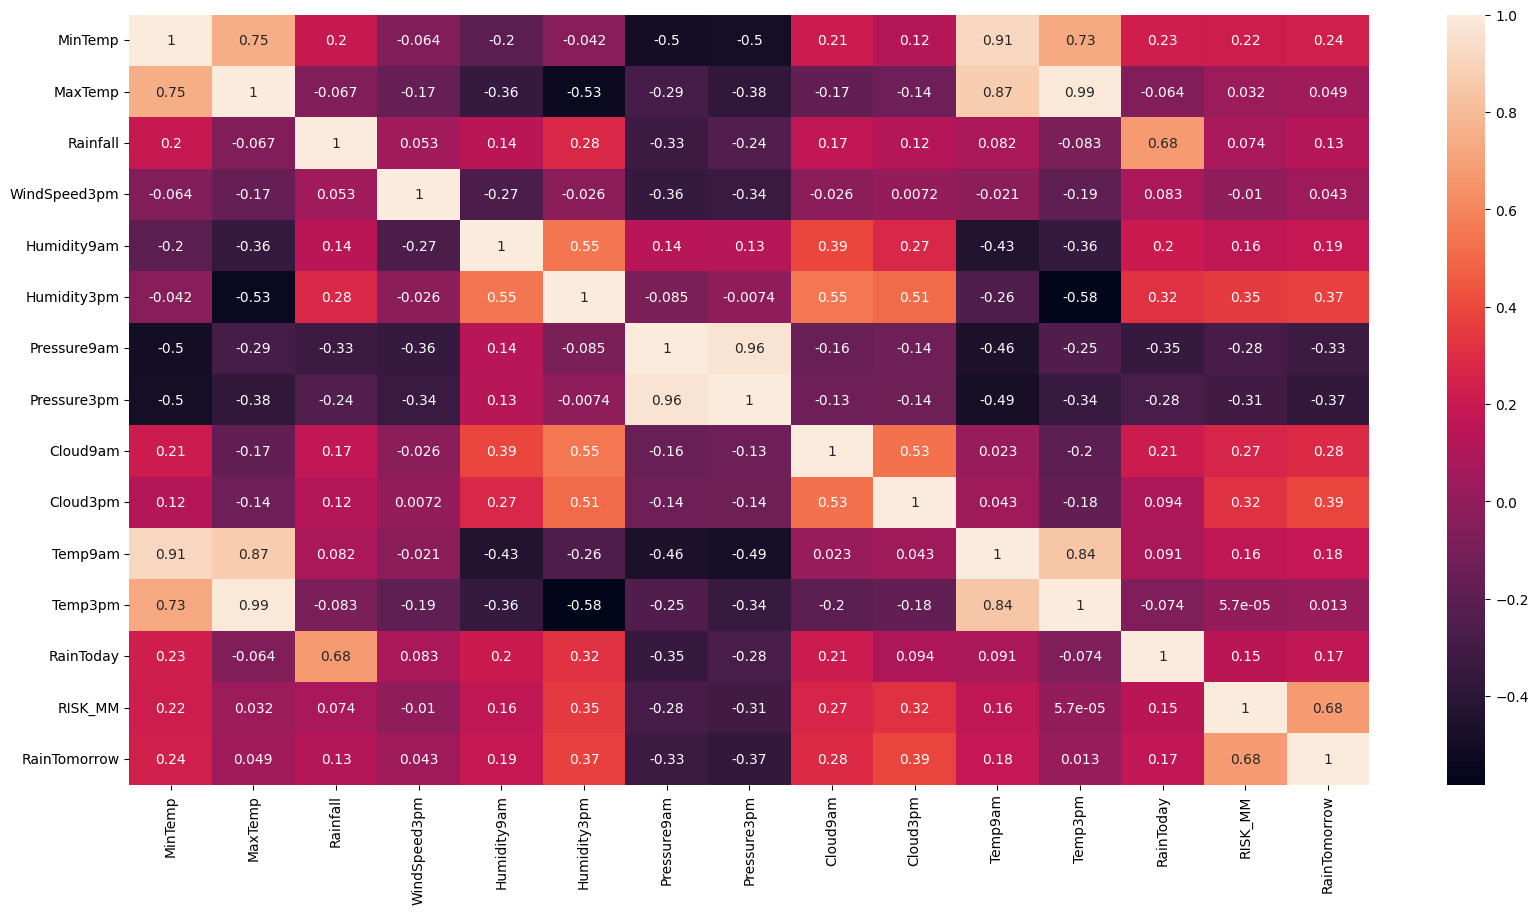

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)


**Prediction using Machine Learning Algorithm
**

In [34]:

X=df.drop("RainTomorrow",axis=1)
y=df["RainTomorrow"]
df.head(5)

,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8,24,0,20,68,29,1019,1015,7,7,14,23,0,3,1
1,14,26,3,17,80,36,1012,1008,5,3,17,25,1,3,1
2,13,23,3,6,82,69,1009,1007,8,7,15,20,1,39,1
3,13,15,39,24,62,56,1005,1007,2,7,13,14,1,2,1
4,7,16,2,28,68,49,1018,1018,7,7,11,15,1,0,0


from matplotlib import pyplot as plt
_df_0['MinTemp'].plot(kind='hist', bins=20, title='MinTemp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MaxTemp'].plot(kind='hist', bins=20, title='MaxTemp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Rainfall'].plot(kind='hist', bins=20, title='Rainfall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['WindSpeed3pm'].plot(kind='hist', bins=20, title='WindSpeed3pm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='MinTemp', y='MaxTemp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='MaxTemp', y='Rainfall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Rainfall', y='WindSpeed3pm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='WindSpeed3pm', y='Humidity9am', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RainToday']
  ys = series['MinTemp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('RainToday', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RainToday')
_ = plt.ylabel('MinTemp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RainToday']
  ys = series['MaxTemp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('RainToday', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RainToday')
_ = plt.ylabel('MaxTemp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RainToday']
  ys = series['Rainfall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('RainToday', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RainToday')
_ = plt.ylabel('Rainfall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RainToday']
  ys = series['WindSpeed3pm']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('RainToday', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RainToday')
_ = plt.ylabel('WindSpeed3pm')

from matplotlib import pyplot as plt
_df_12['MinTemp'].plot(kind='line', figsize=(8, 4), title='MinTemp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['MaxTemp'].plot(kind='line', figsize=(8, 4), title='MaxTemp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Rainfall'].plot(kind='line', figsize=(8, 4), title='Rainfall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['WindSpeed3pm'].plot(kind='line', figsize=(8, 4), title='WindSpeed3pm')
plt.gca().spines[['top', 'right']].set_visible(False)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy 96.88715953307393


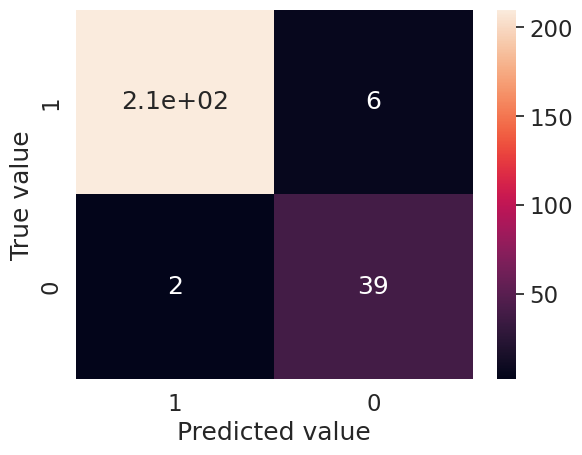

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
LR=LogisticRegression()
logmodel = LR.fit(X_train,y_train)
Y_pred=LR.predict(X_test)
print("Accuracy",LR.score(X_test,y_test)*100)
sns.set(font_scale=1.5)
cm=confusion_matrix(Y_pred,y_test)
sns.heatmap(cm,annot=True,xticklabels=[1,0],yticklabels=[1,0])
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.show()


Accuracy :  98.0544747081712


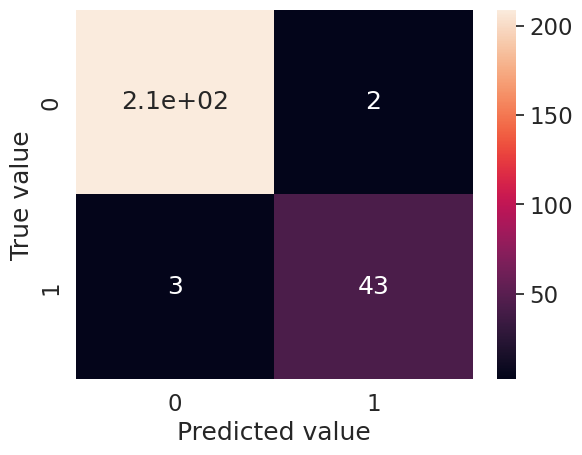

In [37]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
logmodel =  DT.fit(X_train,y_train)
Y_pred = DT.predict(X_test)
print("Accuracy : ",DT.score(X_test,y_test)*100)
sns.set(font_scale=1.5)
cm = confusion_matrix(Y_pred,y_test)
sns.heatmap(cm,annot=True,xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.show()